# <center>Used Car Price Predictions and Data Visualization</center>
## Project Description
<center><img src="image.png" width= 1000 height=600></center>

## Dataset Overview

This dataset contains information on used cars sold in the past, including various features that affect their selling price. It is intended for predictive modeling and price estimation.

Key Columns of Data Set:
- **Brand & Model**: Identify the brand or company name along with the specific model of each vehicle.
- **Model Year**: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
- **Mileage**: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
- **Fuel Type**: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
- **Engine Type**: Understand the engine specifications, shedding light on performance and efficiency.
- **Transmission**: Determine the transmission type, whether automatic, manual, or another variant.
- **Exterior & Interior Colors**: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
- **Accident History**: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
- **Clean Title**: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
- **Price**: Access the listed prices for each vehicle, aiding in price comparison and budgeting.
---
## Project Objective    
- **Data Cleaning**: I will prepare the dataset by handling the missing values using statistical method, removing irrelevant columns, ensuring correct data types for each feature, and addressing outliers.
- **Feature Engineering**: Create new features or modify the existing ones to improve model performance, based on the requirements of the dataset
- **Data Visualization**: Understand the data, I will create boxplots, scatterplots, count plots, bar plots, and time-series-plots.
- **Preprocessing**: Encode categorical variables and scale numerical features for better model performance.
- **Model-Training**: Train 2-3 machine learning models, compare their performance, and select the best-performing model for price prediction.
- **Final Product**: A Jupyter Notebook along with all codes, outputs and model performance

## Importing Libraries and Dataset

In [ ]:
#Importing useful Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, silhouette_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from scipy.stats import randint
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [ ]:
#Loading the data set
url= "Used_Cars_Dataset.csv"
car_data= pd.read_csv(url)
car_data.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


## Data Cleaning

Before analyzing our dataset, it is important to ensure the data is clean and consistent. Data sometimes contains various issues such as:

* Incorrect data types(numbers stored as strings, for instance)
* Missing values(empty cells)
* Duplicate entries(repitation of row/s)
* Outliers(abnormal entries)
* Inconsistent Formatting(for example, making two categories UTA, UT Arlington for a feature, while both represents same thing)

We will have to clean our data to ensure it is ready for analysis and modeling.


### 1. Fixing Inconsistent datatypes:

In [42]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In the above dataset, many features (along with the label) has been assigned wrong datatye, which could cause a problem during modeling and analysis. For instance, `model_year` is stored as `int_64`, but it is a temporal feature, a year (We will be dealing with it in later). Similarly, features like `milage`, `clean_title`, and `price` are stored as an `object`, even though they should be numerical or boolean
Here are the list of columns whose datatype needs to be fixed:
| Feature      | Current Type | Target Type | Notes                                     |
|--------------|--------------|-------------|------------------------------------------ |
| mileage      | Object       | Numeric(int)| Remove units (e.g., 'kmpl') and cast.     |
| clean_title  | Object       | Boolean     | Map 'yes/no' with 'true/false.            |
| price        | Object       | Numeric(int)| Remove symbols ($, ,) and cast.        |

In [43]:
#for milage
car_data['milage']=car_data['milage'].replace([',', 'mi.'], ['', ''], regex=True).astype(int)

#For price
car_data['price']=car_data['price'].str.replace(r'[$,]', '', regex=True).astype(int)

`NOTE`: We can't simply convert the data type for the feature `clean_title` as we need to convert it to a boolean. However, we have 596 empty cells, while the rest of them are 'Yes' (True in Boolean) within that feature. Converting it to Boolean from a string will fill all the empty cells with 'Yes'. We don't want that. Empty cells for Boolean features are considered 'False' in data science. So, we will first fill out the empty cells and later convert them to the Boolean data type.

In [44]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   int64 
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB


### 2. Filling Out Missing Values

Missing values can cuase the baisness in analysis of the data and model training. So it is important to have a proper non-empty dataset for proper visualization and analysis of the data. There are generally 2 ways to get rid of the empty cells. 
1. Dropping the row(s) with null values.
1. Filling out the null values.

However, dropping the rows might cause the loss of data resulting in inappropriate predictions by the model. So, It is better to fill the null values using the statistical tools.

In [45]:
car_data.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

Generally, there are 3 methods to fill a null value. 
1. For categorical data, we use mode (most repetative values in the column) to fill the empty cells. 
2. For numeric data, we use mean and median to fill the empty cells based on the skewness of the data.
3. For boolean data, the empty cells are consideres as False.

In [46]:
#For fule_type
car_data['fuel_type']=car_data['fuel_type'].fillna(value=car_data['fuel_type'].mode()[0])

#For accident
car_data['accident']=car_data['accident'].fillna(value=car_data['accident'].mode()[0])

#For clean_title
car_data['clean_title']=car_data['clean_title'].fillna('No')

In [47]:
car_data[['fuel_type', 'accident', 'clean_title']].isnull().sum()

fuel_type      0
accident       0
clean_title    0
dtype: int64

Now, we can convert `clean_title` to boolean data type.

In [48]:
car_data['clean_title']=car_data['clean_title'].replace(['Yes', 'No'], [True, False]) #This will automatically convert the data type to boolean.


C:\Users\ACER\AppData\Local\Temp\ipykernel_37776\1882593766.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data['clean_title']=car_data['clean_title'].replace(['Yes', 'No'], [True, False]) #This will automatically convert the data type to boolean.


### 3. Removing Duplicate Values

Sometimes datasets contain duplicates (repitation of exactly same rows), which can be computationally inefficient. Additionally, it causes the model to overfit, reducing the overall performance of the model. So, it is better to drop any duplicates, if present, from the dataset.

In [49]:
car_data.duplicated().unique()

array([False])

We are on safe side, since the dataset doesn't seem to have any null values.

### 4. Fixing the Inconsistent Format

Sometimes, features contains inconsisten formats for the categorical data. For example, a column can have two separate values (dog and Dog) that actually represents the same category. It is important to fix such error before modeling or analyzing the data because inconsisten category can mislead the model and effect prediction outcomes.

In [50]:
#Looking at the categorical values for each categorical data.
columns_to_check= ['fuel_type', 'transmission', 'ext_col', 'int_col', 'accident']
for i in columns_to_check:
    print(f"This is the list of column {i}\n {car_data[i].unique()}\n\n")

This is the list of column fuel_type
 ['E85 Flex Fuel' 'Gasoline' 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']


This is the list of column transmission
 ['6-Speed A/T' '8-Speed Automatic' 'Automatic' '7-Speed A/T' 'F' 'A/T'
 '8-Speed A/T' 'Transmission w/Dual Shift Mode' '9-Speed Automatic'
 '6-Speed M/T' '10-Speed A/T' '9-Speed A/T' '5-Speed A/T' '1-Speed A/T'
 'Automatic CVT' '7-Speed Automatic with Auto-Shift' 'CVT-F' 'M/T'
 '6-Speed Automatic with Auto-Shift' '10-Speed Automatic'
 'CVT Transmission' '4-Speed A/T' '6-Speed Automatic' '4-Speed Automatic'
 '7-Speed M/T' '8-Speed Automatic with Auto-Shift' '5-Speed Automatic'
 '8-SPEED AT' '1-Speed Automatic' '5-Speed M/T' 'Manual' '6-Speed Manual'
 'Variable' '2' '7-Speed Manual' 'Automatic, 9-Spd 9G-Tronic'
 'Automatic, 8-Spd' 'Automatic, 8-Spd Sport w/Sport & Manual Modes' '–'
 'Auto, 6-Spd w/CmdShft' 'Transmission Overdrive Switch'
 '7-Speed Automatic' 'Automatic, 8-Spd PDK Dual-Clutch'
 'Automatic, 8-Spd M STEPTRONIC 

There are some fixes we need in features like `fuel_type` and `transmission`. 
- For `fuel_type`:

It consists of 2 categories '-' and 'not supported' which represents the same thing: fule is not supported in the car. So, we replace '-' with 'not supported'

In [51]:
car_data['fuel_type']=car_data['fuel_type'].replace('–', 'not supported', regex=True)
car_data['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       'not supported'], dtype=object)

- For `transmission`:

The `transmission` column contains many variations of the same category (e.g., *"8-SPEED A/T"*, *"Automatic, 8-Spd"*, *"Automatic CVT"*, etc.).  
To clean this, we will convert all text to lowercase, remove special characters, and standardize spacing.  
We will then map the values into consistent categories such as **Automatic, Manual, CVT,** and **Other**, so that different representations of the same transmission type are treated uniformly during analysis. Additionally, we will drop rows containing `'–'` as the transmission type since this category does not provide useful information.

In [52]:
car_data= car_data[car_data['transmission']!= '–'] #excluding the cells where transmission = '–'

In [53]:
car_data['transmission']= (car_data['transmission']
                           .str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True) #includes only alphanumeric values.
                           .str.replace(r'\s+', ' ', regex=True) #Collapse spaces
                           .str.strip()) #Removes extra spacings

In [54]:
#Defining a function to fix the insonsistency of the transmission column.
def format_transmission(raw_data):
    if 'automatic' in raw_data or 'at' in raw_data:
        return 'Automatic'
    elif 'manual'in raw_data or 'mt' in raw_data:
        return 'Manual'
    elif 'cvtf' in raw_data or 'cvt' in raw_data:
        return 'CVT'
    else:
        return 'Other'

In [55]:
car_data['transmission']=car_data['transmission'].apply(format_transmission)
car_data['transmission'].unique()

array(['Automatic', 'Other', 'Manual', 'CVT'], dtype=object)

- For `engine`

In [56]:
car_data[car_data['engine']=='–'].head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
130,Chrysler,Pacifica Touring,2017,87305,not supported,–,Automatic,Silver,Black,None reported,True,9000
257,Toyota,Land Cruiser Base,1993,231500,not supported,–,Automatic,White,Gray,None reported,True,29500
338,Mazda,Mazda3 s Grand Touring,2016,85000,not supported,–,Automatic,Black,Black,At least 1 accident or damage reported,True,18500
491,Chrysler,Pacifica Touring,2017,63000,not supported,–,Automatic,White,Beige,None reported,True,20000
692,Honda,Civic EX,1993,58981,not supported,–,Automatic,White,Beige,None reported,True,9599
923,Dodge,Challenger R/T,2010,100100,not supported,–,Other,Purple,Black,None reported,True,17000
995,Dodge,Challenger R/T Scat Pack,2019,43000,not supported,–,Manual,Green,Black,None reported,True,50000
1063,Mazda,Mazda6 i Grand Touring,2016,83100,not supported,–,Automatic,White,White,None reported,True,17800
1083,Dodge,Challenger R/T,2010,73000,not supported,–,Automatic,Black,Black,None reported,True,17500
1084,Chevrolet,Sonic LT,2013,110000,not supported,–,Automatic,Gray,Black,None reported,True,7500


We can see that the cars which don't support fule seems to have no engine. Generally, electric cars (or one that doesn't have any fuel type) have electric engine within them instead of traditional combustion engines.

In [57]:
car_data['engine']=car_data['engine'].str.replace('–', 'Electric')

### 5. Removing the outliers

Outliers are extreme values that are present in the data. They can cause the skewness of the data, dostorting the stastistical measures, and even decrease the model's overall performance. Removing outliers makes the analysis and model more reliable. 

In [58]:
car_data.select_dtypes(include=int).describe()

,model_year,milage,price
count,4005.000000,4005.000000,4.005000e+03
mean,2015.523096,64768.166292,4.436553e+04
std,6.071196,52296.888588,7.823844e+04
min,1992.000000,100.000000,2.000000e+03
25%,2012.000000,23097.000000,1.710000e+04
50%,2017.000000,53000.000000,3.100000e+04
75%,2020.000000,94155.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


*Mileage*:  
The dataset contains some cars with extremely high mileage, with the maximum observed value being 405,000 miles. While such mileage is possible for older or heavily used vehicles, it is significantly higher than the average car’s mileage. This makes high-mileage cars potential outliers, which could influence statistical analysis or predictive modeling if not addressed properly.

*Price*:    
The maximum car price in the dataset is 2,954,083 (nearly 2.95 million), which is extremely high compared to typical car prices. While such a price is possible for luxury or supercars like Bugatti or Rolls-Royce, it is far above the range of ordinary cars and is therefore considered an outlier. Including such extreme values without handling them could skew metrics like mean price, and may affect the accuracy of models predicting car value.

In [59]:
numeric_columns = ['milage', 'price'] 
for column in numeric_columns: 
    Q1 = car_data[column].quantile(0.25) 
    Q3 = car_data[column].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_whisker = Q1 - 2 * IQR 
    upper_whisker = Q3 + 2 * IQR 
    car_data= car_data[(car_data[column]>=lower_whisker) & (car_data[column]<=upper_whisker)]

car_data.reset_index(inplace=True, drop=True)
car_data.select_dtypes(include=int).describe()

,model_year,milage,price
count,3788.000000,3788.000000,3788.000000
mean,2015.393347,66026.504224,34606.690074
std,6.043630,49241.020851,22734.131776
min,1992.000000,100.000000,2000.000000
25%,2012.000000,25909.000000,16900.000000
50%,2017.000000,55483.500000,29998.000000
75%,2020.000000,95462.500000,46500.000000
max,2024.000000,235000.000000,114900.000000


With this we have successfully cleaned the data. Now lets move on to Exploratory Data Analysis (EDA) and Visualization.

## Exploratory Data Analysis (EDA) and Visualization

### 1. Summary Statistics

In [60]:
car_data.select_dtypes(include='int').describe()

,model_year,milage,price
count,3788.000000,3788.000000,3788.000000
mean,2015.393347,66026.504224,34606.690074
std,6.043630,49241.020851,22734.131776
min,1992.000000,100.000000,2000.000000
25%,2012.000000,25909.000000,16900.000000
50%,2017.000000,55483.500000,29998.000000
75%,2020.000000,95462.500000,46500.000000
max,2024.000000,235000.000000,114900.000000


The dataset contains numeric columns such as `model_year`, `milage`, and `price`.
* The car models ranges from 1992 to 2024 (with mean ~2015). It covers both old modeled cars and new modeled cars.
* `milage` and `price` cover a wide range with some extreme values (even after dealing with outliers). This may influence the statistical analysis and modeling.

In [61]:
car_data.select_dtypes(include='object').describe()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident
count,3788,3788,3788,3788,3788,3788,3788,3788
unique,55,1797,6,1065,4,282,136,2
top,Ford,M3 Base,Gasoline,Electric,Automatic,Black,Black,None reported
freq,377,30,3283,60,2980,857,1933,2820


The dataset is diverse in categorical features like `brand`, `fuel_type`, `transmission`, `color`, and more. Some categories like Gasoline and Automatic dominate the dataset with 3283 and 2980 repetations respectively. Almost half of the cars, present in the dataset, have black interior and more than half of the cars has no accidents reported in the past. The column `engine` seems to have some important informations within it which will later be extracted using the feature engineering techniques. 

In [62]:
correlation=car_data.select_dtypes(include='int').corr()
correlation

,model_year,milage,price
model_year,1.000000,-0.616794,0.573352
milage,-0.616794,1.000000,-0.640691
price,0.573352,-0.640691,1.000000


There is a strong negative correlation between `milage` and `price` (~ -0.64) showing that higher usage of the car reduces its value. Similarly, `milage` and `model_year` have a coorelation coefficient of -0.61 signifying newer cars have lower usage and `model_year` and `price` have a positive correlation (~0.57) showing new model cars have higher value in the market than the older ones.

### 2. Visualization   
Data Visualization is the practice of representing data visually using charts, graphs, and plots to make patterns, trends, and insights easier to understand.
It helps transform raw numbers into meaningful stories that can guide decision-making.

- **Correlation Heatmap**

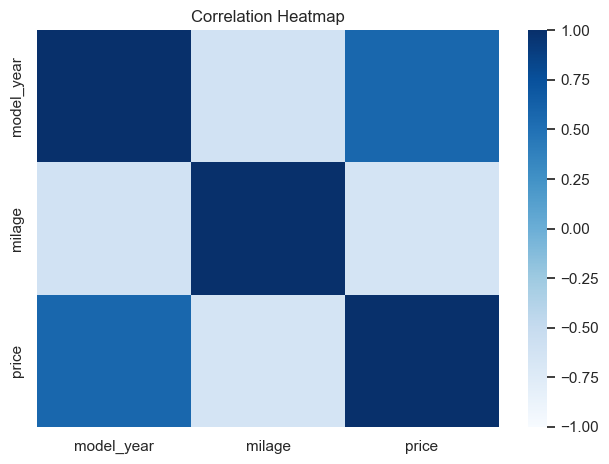

In [63]:
plt.Figure(figsize=(10,8))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap='Blues')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

The above heatmap shows the visual representation of the correlation between the numeric variables.

- **Probability Distribution of Numeric Features**

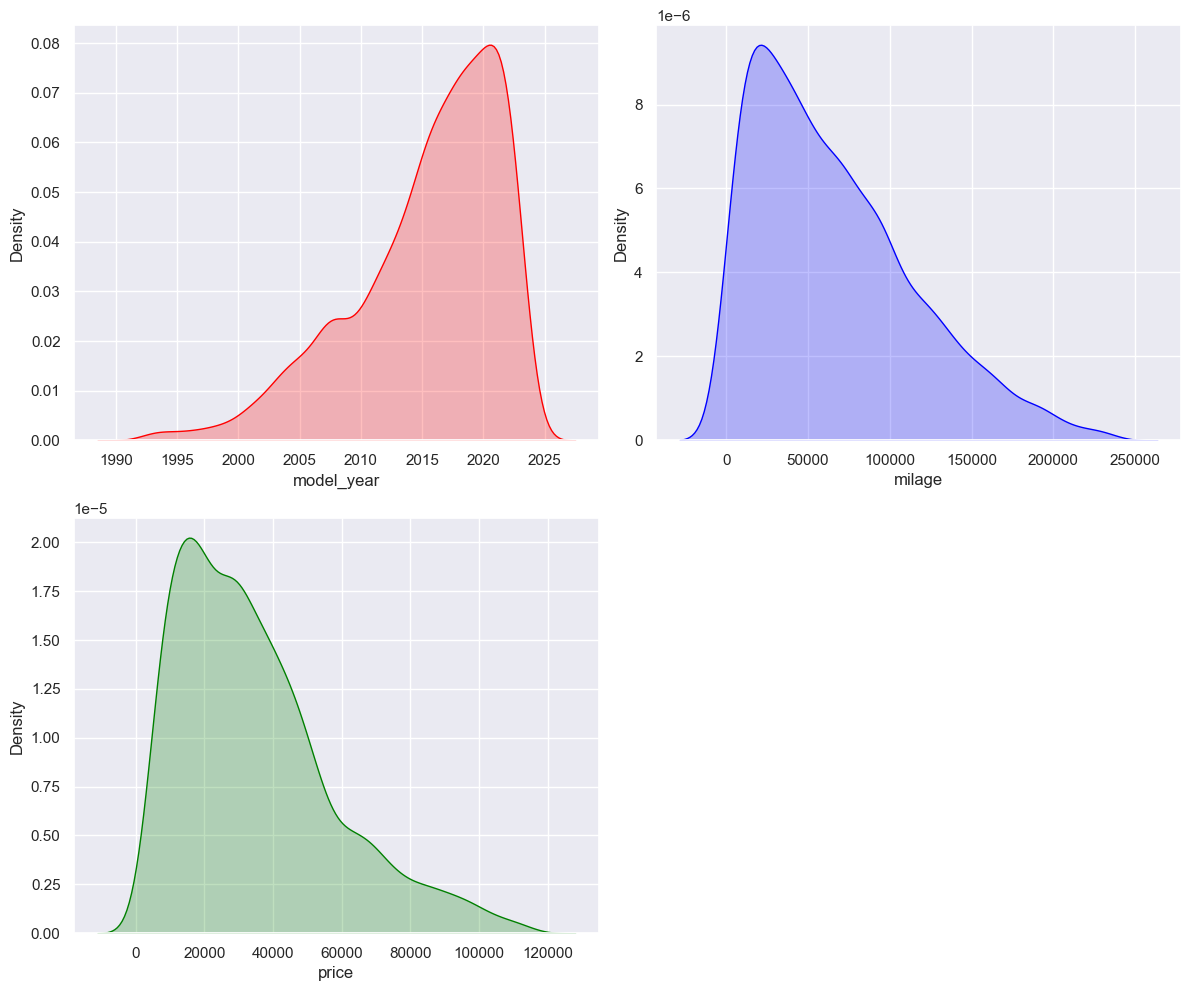

In [64]:
n_rows= 2
numeric_columns= car_data.select_dtypes(include=int).columns.to_list()
n_columns= int(np.ceil(len(numeric_columns)/n_rows))
colors= ['red', 'blue', 'green']

plt.figure(figsize=(12,10))
for idx, column in enumerate(car_data[numeric_columns],1):
    plt.subplot(n_rows, n_columns, idx)
    #sns.histplot(data=Car_data, x=column, bins=50, kde=True)
    sns.kdeplot(data=car_data, x= column, fill=colors[idx-1], color=colors[idx-1])
sns.set_theme('paper')
plt.tight_layout()

- **Scatter Plots**

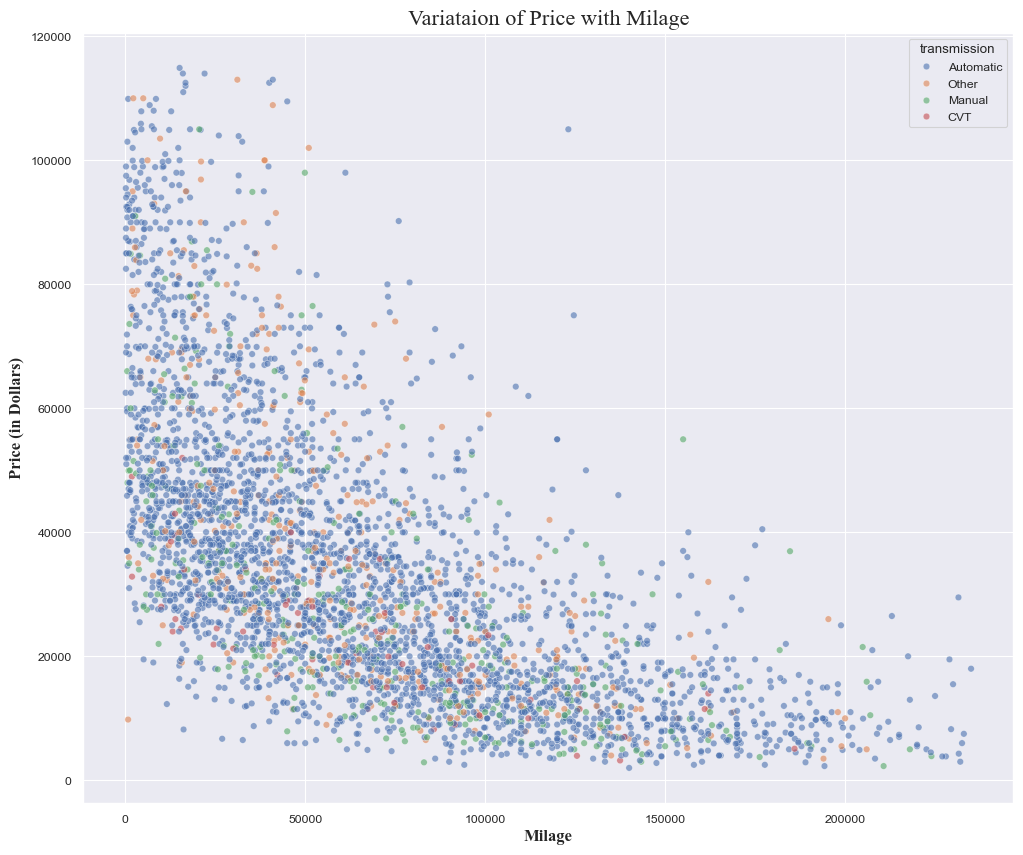

In [65]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=car_data, x='milage', y='price', hue='transmission', alpha=0.6)
plt.xlabel('Milage', fontdict={'family': 'Times New Roman', 'size':12, 'fontweight':'bold'})
plt.ylabel('Price (in Dollars)', fontdict={'family': 'Times New Roman', 'size':12, 'fontweight':'bold'})
plt.title('Variataion of Price with Milage', fontdict={'family': 'Times New Roman','size': 16})
sns.set_theme('paper')
plt.show()

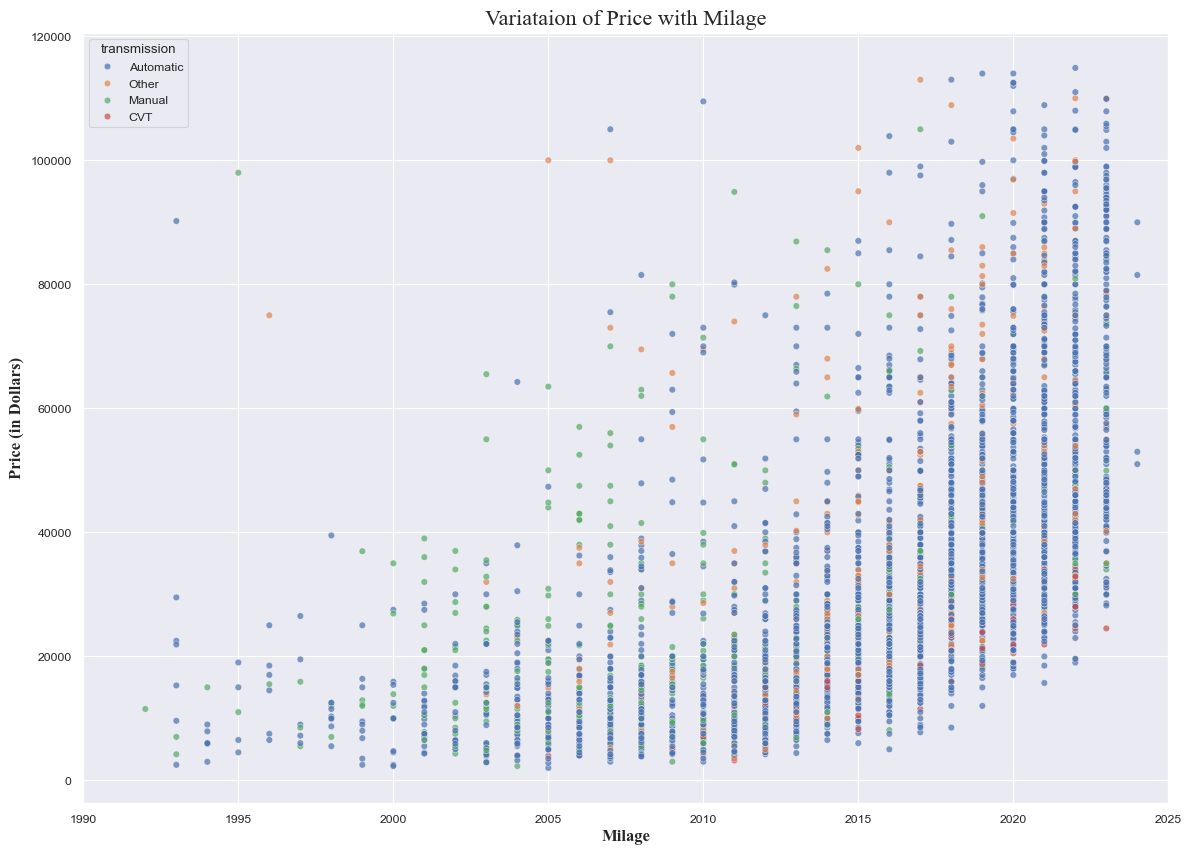

In [66]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=car_data, x='model_year', y='price', hue='transmission', alpha=0.7)
plt.xlabel('Milage', fontdict={'family': 'Times New Roman', 'size':12, 'fontweight':'bold'})
plt.ylabel('Price (in Dollars)', fontdict={'family': 'Times New Roman', 'size':12, 'fontweight':'bold'})
plt.title('Variataion of Price with Milage', fontdict={'family': 'Times New Roman','size': 16})
plt.xlim(left=1990, right=2025)
sns.set_theme('notebook')
plt.show()

### 3. Case Study I

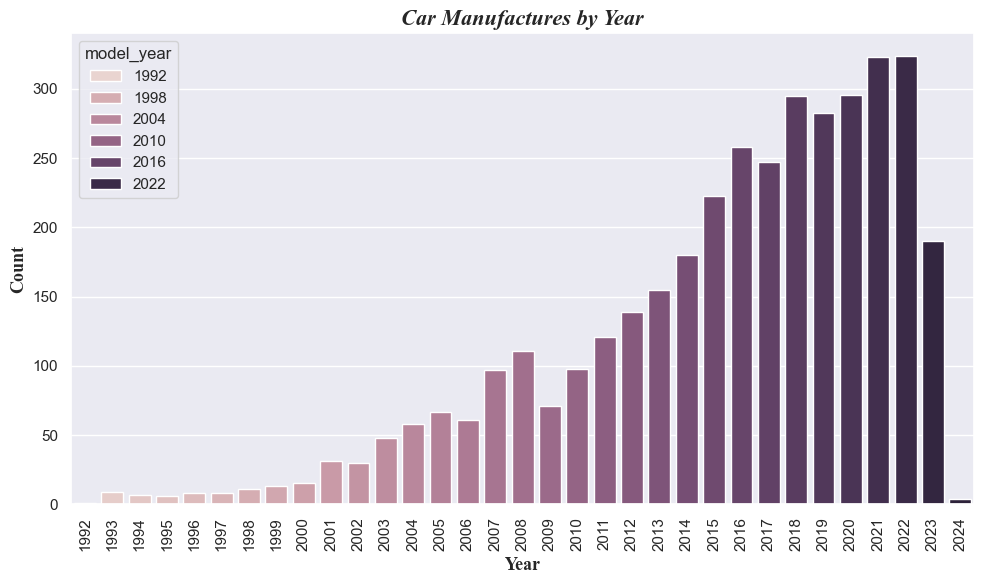

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(data=car_data, x='model_year', width=0.8, hue='model_year')
plt.xticks(rotation=90)
plt.xlabel('Year', fontdict={'family': 'Times New Roman', 'size':13, 'weight': 'bold'})
plt.ylabel('Count', fontdict={'family': 'Times New Roman', 'size':13, 'weight': 'bold'})
plt.title('Car Manufactures by Year', fontdict={'family': 'Times New Roman', 'style': 'oblique', 'size':16, 'weight': 'bold'})
sns.set_style('darkgrid')
sns.set_theme('notebook')
plt.tight_layout()
plt.show()

Most objects lose value as they age, but antiques are a fascinating exception: their value can rise with time. What about cars? Do they always depreciate, or can some become valuable classics? Let’s explore how car prices typically change as they get older, and see what the data reveals.

In [68]:
time_series_data= pd.DataFrame(car_data.groupby(by=['model_year'])['price'].mean(), columns=['price'])

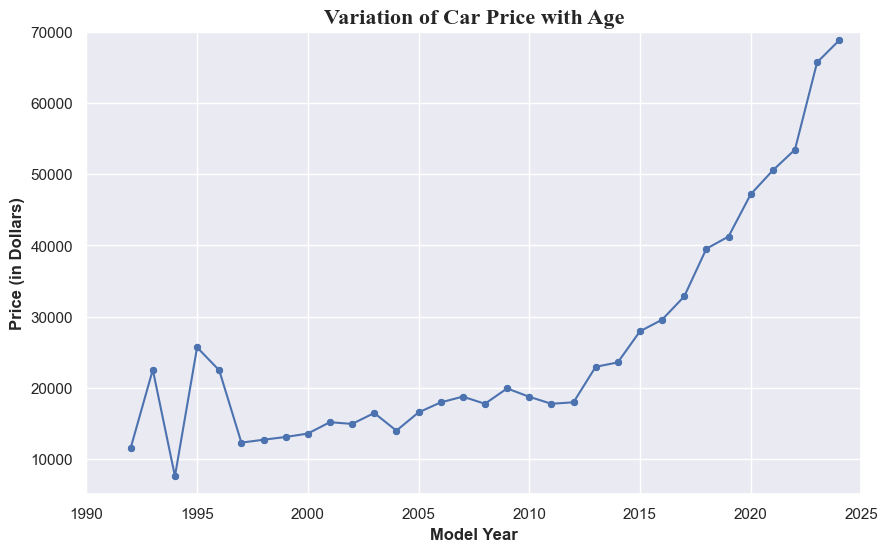

In [69]:
#Plotting
plt.figure(figsize=(10,6))
sns.lineplot(data=time_series_data, x='model_year', y='price')
sns.scatterplot(data=time_series_data, x='model_year', y='price')
plt.title('Variation of Car Price with Age', fontdict={'family': 'Times New Roman','size': 16, 'fontweight': 'bold'})
plt.xlabel('Model Year', fontdict={'fontweight':'bold'})
plt.ylabel('Price (in Dollars)', fontdict={'fontweight':'bold'})
sns.set_theme('notebook')
plt.xlim(left=1990, right=2025)
plt.ylim(5000,70000)
plt.show()

The line chart shows the variation of car prices by model year.
We can observe a clear trend:
* Older model years (1990s and early 2000s) generally have lower average prices, which reflects the natural effect of depreciation — as cars age, their market value tends to drop.
* Starting from around 2010 onward, prices begin to rise steadily, and the increase becomes much sharper after 2015, reaching the highest levels for the most recent models.    
This sharp growth suggests that newer models are valued significantly higher, likely due to inflation, technological advancements, and higher base costs of manufacturing.

But averages can hide important details within. For example, does having a accident history reduce the car's value even more?

In [70]:
accident_car_data= pd.DataFrame(car_data.groupby(by=['model_year', 'accident'])['price'].mean(), columns=['price'])

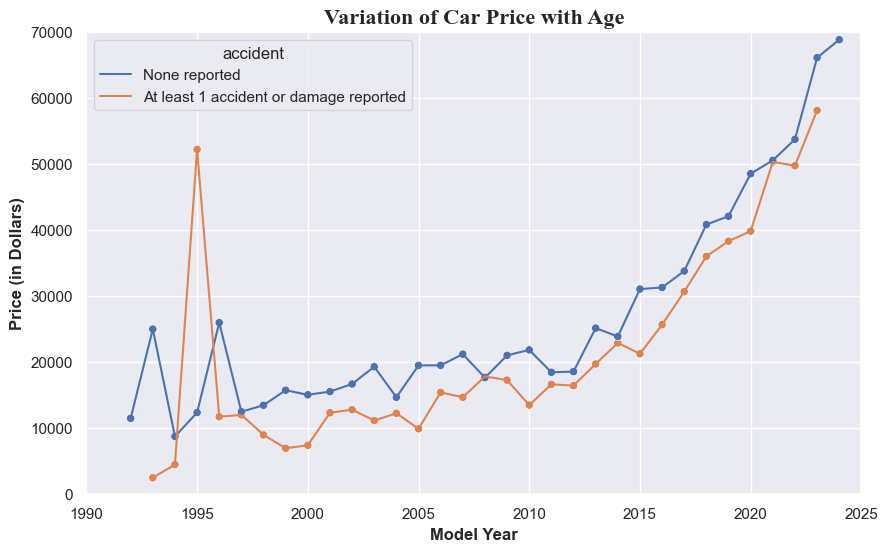

In [71]:
#Plotting
plt.figure(figsize=(10,6))
sns.lineplot(data=accident_car_data, x='model_year', y='price', hue='accident')
sns.scatterplot(data=accident_car_data, x='model_year', y='price', hue='accident', legend=False)
plt.title('Variation of Car Price with Age', fontdict={'family': 'Times New Roman','size': 16, 'fontweight': 'bold'})
plt.xlabel('Model Year', fontdict={'fontweight':'bold'})
plt.ylabel('Price (in Dollars)', fontdict={'fontweight':'bold'})
sns.set_theme('notebook')
plt.xlim(left=1990, right=2025)
plt.ylim(0,70000)
plt.show()

When we separate cars into two groups — those with no accidents and those with at least one accident reported — a clear pattern emerges. Across almost all model years, cars with accident history (orange line) sell for noticeably less than those without accidents (blue line). The gap widens for newer models, suggesting that accidents have a stronger negative impact on resale value when the car is relatively new.

However, we still see some spikes and overlaps, which shows that other factors like mileage, brand, and market demand also influence prices. Accident history is just one piece of the puzzle.  

Averages can sometimes be misleading. They hide the variation in individual car prices. In reality, two cars from the same year can sell for very different amounts, depending on mileage, brand, condition, and many other factors.

To really understand this, let’s look at the actual datapoints. Instead of just the smoothed lines, here’s how the prices of individual cars are distributed across model years.”

In [72]:
car_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,At least 1 accident or damage reported,True,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,True,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,False,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,Black,Black,None reported,True,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Glacier White Metallic,Black,None reported,False,34999


* **High Spike Investigation (1995 Car)**

In [73]:
car_data[(car_data['model_year']==1995) & (car_data['accident']!= 'None reported')]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1215,Chevrolet,1500 Cheyenne Extended Cab,1995,120000,not supported,Electric,Automatic,White,Brown,At least 1 accident or damage reported,True,6500
2680,Porsche,911 Carrera,1995,49900,not supported,Electric,Manual,Silver,Gray,At least 1 accident or damage reported,True,97993


During the analysis of variation of average car price with the age, a price spike was observed for the model year 1995. Upon further investigation, this car is itentified as a `Porsche 911 Carrera` that prices approximately `$98,000` despite having `at least one accident ot damage reported`.   
Porche is a `luxury brand` and its high market value explains why this car stands out significantly compared to other vehicles of similar age. Therefore, this data point, despite being extreme is justified.

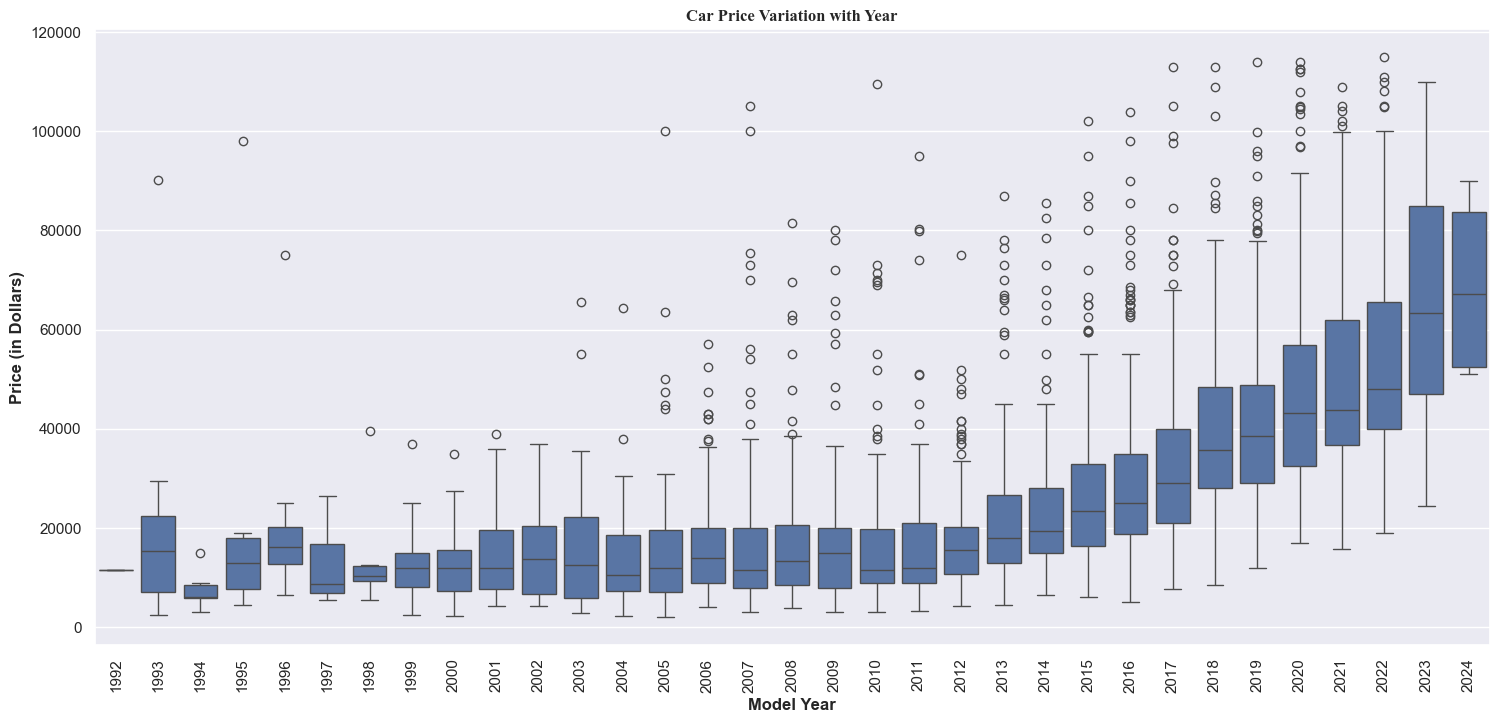

In [74]:
#Box plot:
plt.figure(figsize=(18,8))
sns.boxplot(data=car_data, x='model_year', y='price')
plt.xticks(rotation=90)
plt.xlabel('Model Year', fontdict={'size': 12, 'fontweight': 'bold'})
plt.ylabel('Price (in Dollars)', fontdict={'size': 12, 'fontweight': 'bold'})
plt.title('Car Price Variation with Year', fontdict={'family': 'Times New Roman','size': 12, 'fontweight': 'bold'})
plt.show()

In 1995, car prices show a notable spike due to a single outlier rather than a general trend. Most cars remain within a typical price range despite occasional spikes. This highlights how individual extreme values can distort summary statistics

### 4. Case Study II

Transmission type is an important factor in the used car market, often influencing both buyer preference and price. In many regions, automatic transmissions dominate modern cars, while manual cars are becoming less common.

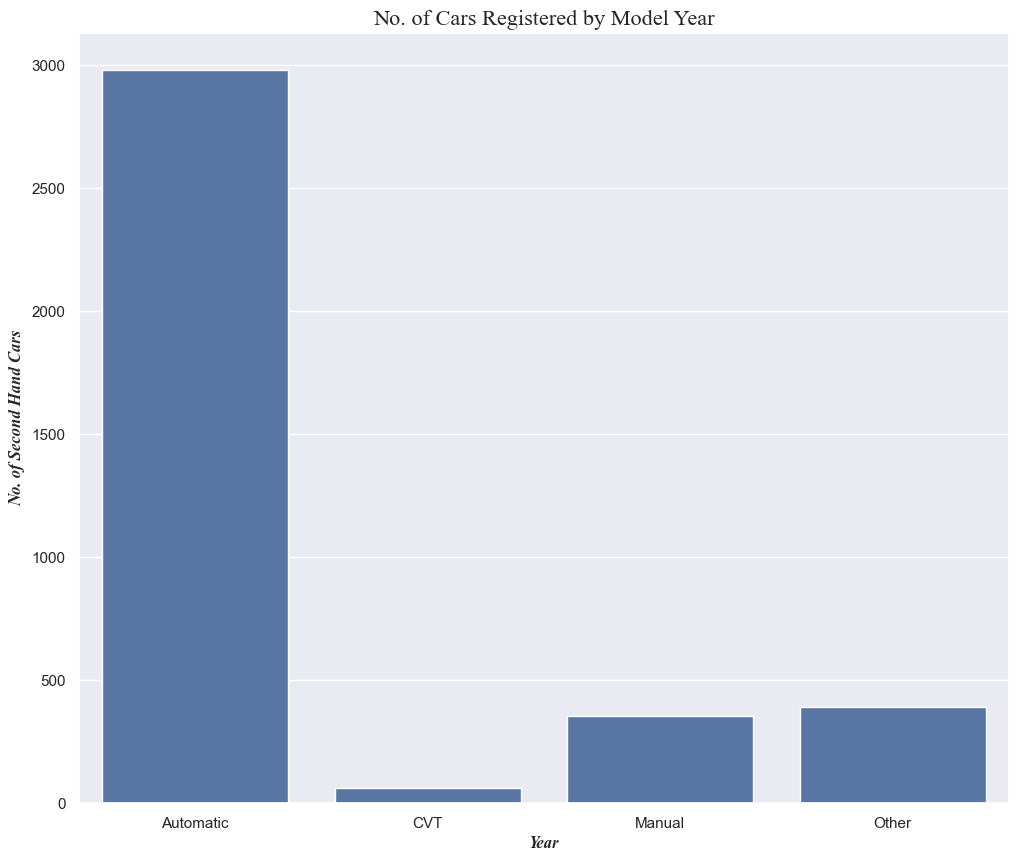

In [75]:
plt.figure(figsize=(12,10))
orders=car_data['transmission'].unique()
orders.sort()
sns.countplot(data=car_data, x='transmission', order=orders)
#plt.xticks(rotation=90)
plt.xlabel('Year', fontdict={'family': 'Times New Roman', 'style': 'oblique', 'size':12, 'weight': 'bold'})
plt.ylabel('No. of Second Hand Cars', fontdict={'family': 'Times New Roman', 'style': 'oblique', 'size':12, 'weight': 'bold'})
#plt.ylim(bottom=500)
plt.title('No. of Cars Registered by Model Year', fontdict={'family': 'Times New Roman','size': 16})
sns.set_theme('notebook')
plt.show()

The dataset shows that most used cars are automatic, reflecting a strong market preference for automatics in recent years. This suggests that buyers are more likely to encounter automatic listings when shopping for used cars.
But are the new cars most likely to be automatic?

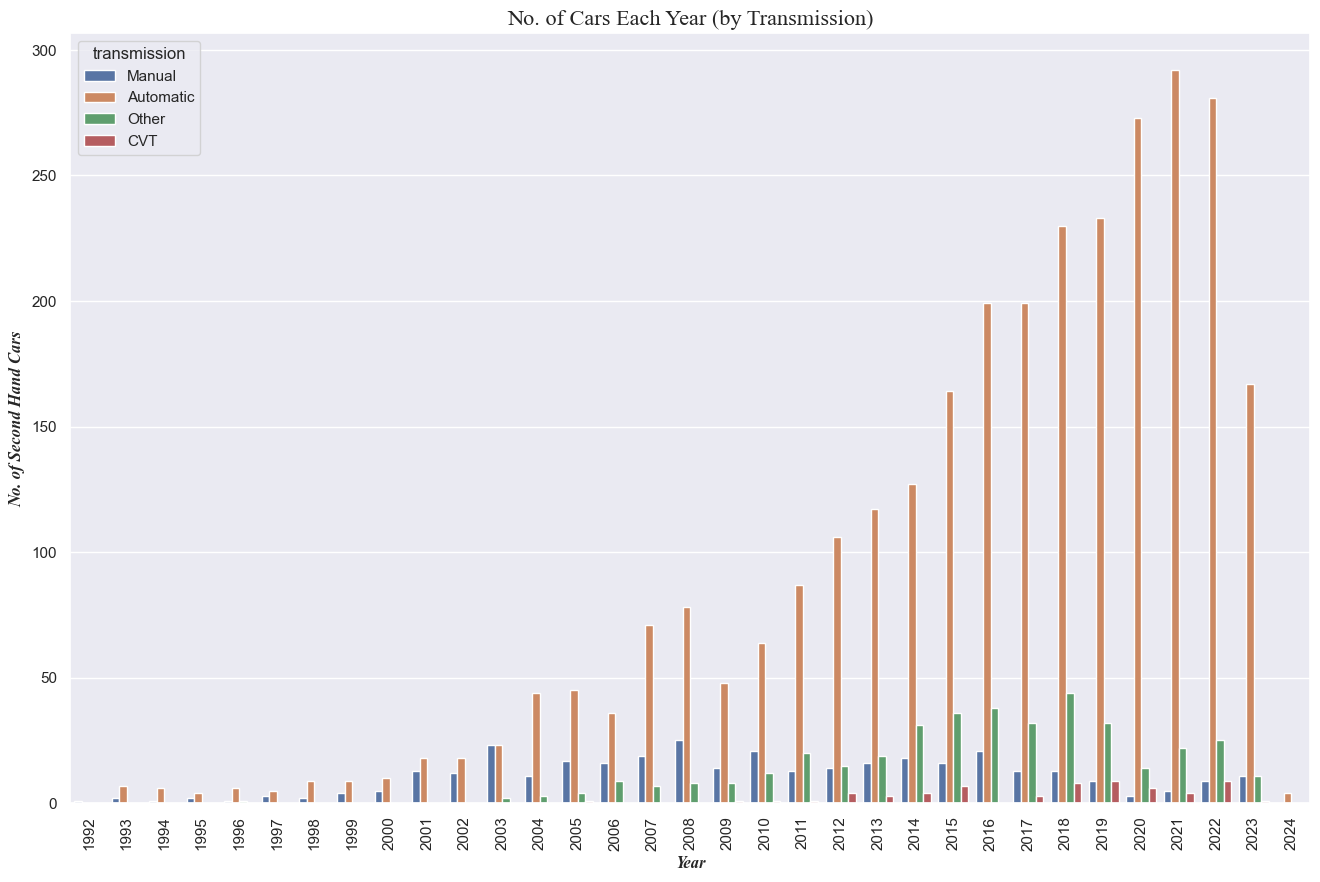

In [76]:
plt.figure(figsize=(16,10))
sns.countplot(data=car_data, x='model_year', hue='transmission')
plt.xticks(rotation=90)
plt.xlabel('Year', fontdict={'family': 'Times New Roman', 'style': 'oblique', 'size':12, 'weight': 'bold'})
plt.ylabel('No. of Second Hand Cars', fontdict={'family': 'Times New Roman', 'style': 'oblique', 'size':12, 'weight': 'bold'})
plt.title('No. of Cars Each Year (by Transmission)', fontdict={'family': 'Times New Roman','size': 16})
plt.ylim()
sns.set_theme('notebook')
plt.show()

The dataset is heavily dominated by automatic cars across all years, including the 1990s. Unlike the common expectation that manual cars were more prevalent in older models, this dataset shows that automatics have consistently been the majority. This suggests that the market prefers automatic transmissions, regardless of model year.

**Does the mode of transmission effect the price of car?**

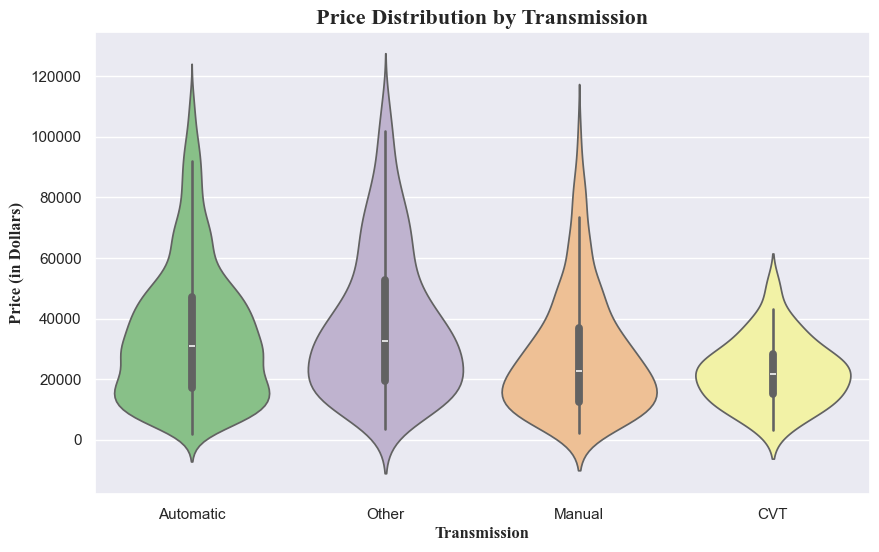

In [77]:
accident_car_data= pd.DataFrame(car_data.groupby(by=['model_year', 'transmission'])['price'].mean(), columns=['price'])

plt.figure(figsize=(10,6))
sns.violinplot(data=car_data, x='transmission', y='price', hue='transmission', palette='Accent')
plt.ylabel('Price (in Dollars)', fontdict={'fontfamily': 'Times New Roman', 'size':12, 'fontweight': 'bold'})
plt.xlabel('Transmission', fontdict={'fontfamily': 'Times New Roman', 'size':12, 'fontweight': 'bold'})
plt.title("Price Distribution by Transmission", fontdict={'fontfamily': 'Times New Roman', 'size':16, 'fontweight': 'bold'})
sns.set_theme('paper')
plt.show()

The violin plot shows that the price distribution for automatic, manual, and “other” transmission types is quite similar. All three categories span a wide range of prices, with medians clustered in a comparable range. In contrast, cars with CVT transmissions are priced noticeably lower, with their distribution concentrated in the lower range and lacking the higher-value outliers seen in the other groups. At first glance, CVT vehicles appear cheaper than other types. But is it really the transmission that determines price, or could something else be influencing this pattern?

* **Are CVT Cars Cheaper Because of the Transmission or the Manufracturer?**

In [78]:
car_manufractureres=pd.DataFrame(car_data.groupby(by=['brand', 'transmission'])['transmission'].count())
car_manufractureres = car_manufractureres.rename(columns={'transmission': 'count'})
count_summary=car_manufractureres.pivot_table(columns='transmission', index='brand', values='count')
count_summary.fillna(0, inplace=True)
print("Total Number of Cars Based on Transimssion and Brand:")
count_summary[count_summary['CVT']!=0]

Total Number of Cars Based on Transimssion and Brand:


transmission,Automatic,CVT,Manual,Other
brand,,,,
Ford,310.0,7.0,42.0,18.0
Honda,41.0,6.0,14.0,1.0
INFINITI,40.0,2.0,5.0,12.0
Kia,73.0,2.0,0.0,1.0
Lexus,135.0,5.0,1.0,16.0
Lincoln,45.0,1.0,0.0,6.0
Mitsubishi,9.0,2.0,8.0,1.0
Nissan,75.0,13.0,16.0,10.0
Subaru,17.0,16.0,26.0,5.0


We can clearly see that cars with `CVT` transmission are generally manufractured by mid-tier companies which explains lower price cost for such cars.

In [79]:
car_manufractureres=pd.DataFrame(car_data.groupby(by=['brand', 'transmission'])['price'].mean())
car_manufractureres = car_manufractureres.rename(columns={'price': 'mean_price'})
price_summary=car_manufractureres.pivot_table(columns='transmission', index='brand', values='mean_price')
price_summary.fillna(0, inplace=True)
print("Average Price of Different Transmission Mean for Different Brands:")
price_summary[price_summary['CVT']!=0]

Average Price of Different Transmission Mean for Different Brands:


transmission,Automatic,CVT,Manual,Other
brand,,,,
Ford,34843.441935,23907.000000,36570.809524,45999.611111
Honda,22414.219512,20581.000000,23553.571429,5200.000000
INFINITI,24923.400000,28000.000000,15360.000000,18582.916667
Kia,28064.767123,23200.000000,0.000000,40200.000000
Lexus,33436.281481,29019.000000,18500.000000,37592.937500
Lincoln,27653.911111,49000.000000,0.000000,29963.333333
Mitsubishi,11957.222222,7800.000000,25099.750000,27000.000000
Nissan,23375.960000,14327.846154,18789.937500,48339.700000
Subaru,18430.764706,22196.625000,21547.038462,29399.600000


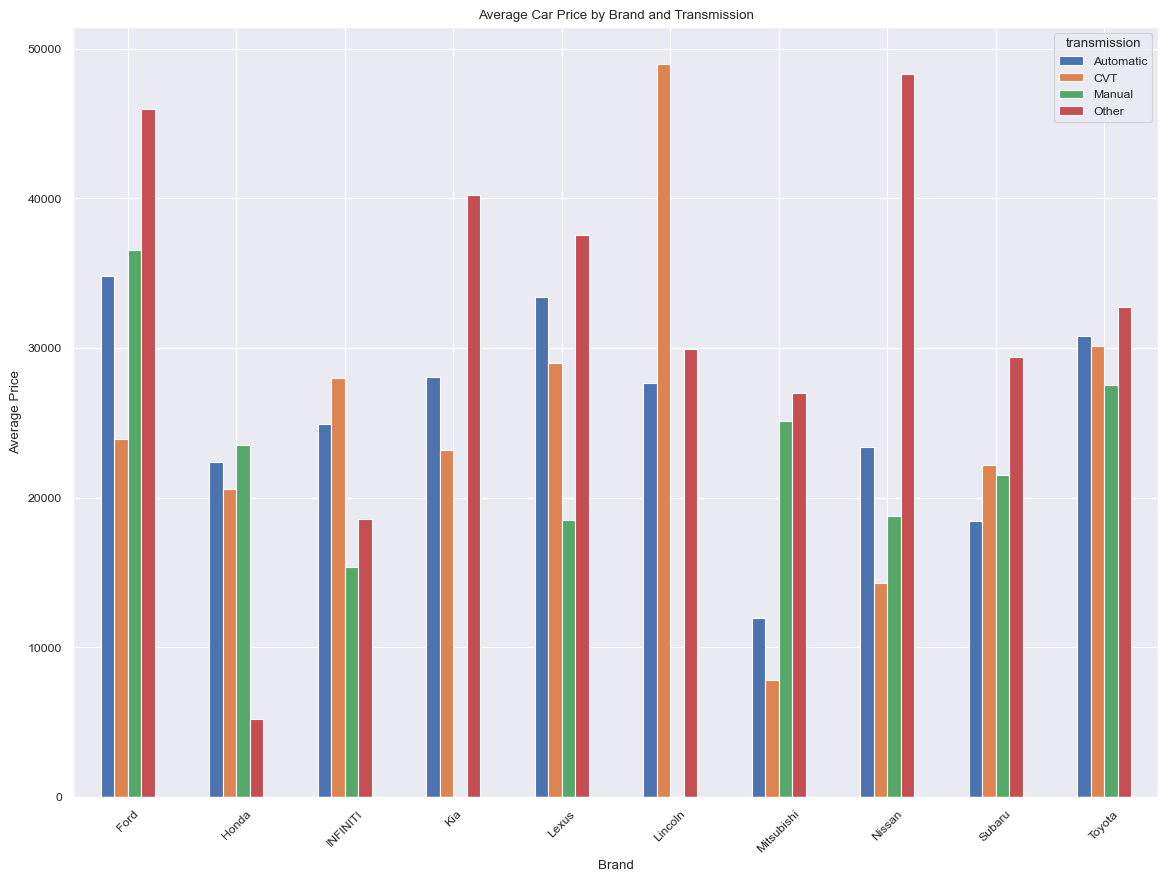

In [80]:
price_summary[price_summary['CVT']!=0].plot(kind='bar', figsize=(14,10))
plt.ylabel('Average Price')
plt.xlabel('Brand')
plt.title('Average Car Price by Brand and Transmission')
plt.xticks(rotation=45)
sns.set_theme('notebook')
plt.show()

By analyzing the average price of cars by brand and transmission type we can conclude that the bar heights (representing the average price) for different transmission types within different brands is roughly the same. This indicates that the lower price of CVT cars is likely due to the fact that CVT are mostly manufractured by the mid-tier brands, rather than the transmission type itself influencing the price.

## Feature Engineering

Car price prediction is a linear regression model. So, using string features, like brand and model, directly into the model is not a great approach. Here are some of the few approaches that can be considered:
- Encoding the Brand and model, then using it in the model. However, with hundreds of brands and thousands of model types, encoding these features gets pretty hectic.
- Deriving a new numeric feature named `fanciness` derived from prices based on brands and models of the car. Since better brands and models will have higher price, the fanciness score assigned to the respective car would be more and vice-versa. 
- Saving the fetaures separately, and not using it for training the model.  

Among the above mentiond approaches,  we will try implementing the the second and third methods and compare the model's performance. Then we will save the best model we get.

In [81]:
# Strong the brands and models of the car separately
car_models=car_data['model']
car_brands= car_data['brand']

### 1. Adding a new feature Fanciness (Test)

- Directions for the approach:  
The `model` feature has 1,797 unique categories, making it impractical to use directly in training. Instead, we derive a new feature called `fanciness`. Since the price of a car generally reflects its luxury level, and luxury is strongly related to the `model` and `brand`, we create the `fanciness` based on the car’s price. This numeric feature captures the model’s relative luxury while remaining suitable for machine learning.

In [82]:
#Uncomment for observing model performances with fanciness feature

'''
# Defining Average Brand Price
brand_average_price=car_data.groupby(by=['brand'])['price'].mean().reset_index()
car_data=car_data.merge(brand_average_price, how='left', on=['brand'])
car_data.rename(columns={'price_x': 'price', 'price_y': 'average_brand_price'}, inplace=True)
'''

"\n# Defining Average Brand Price\nbrand_average_price=car_data.groupby(by=['brand'])['price'].mean().reset_index()\ncar_data=car_data.merge(brand_average_price, how='left', on=['brand'])\ncar_data.rename(columns={'price_x': 'price', 'price_y': 'average_brand_price'}, inplace=True)\n"

In [83]:
        #Uncomment for observing model performances with fanciness feature




        # Defining Average Model Price
#model_average_price= car_data.groupby(by=['brand', 'model'])['price'].mean().reset_index()
#car_data=car_data.merge(model_average_price, on=['brand', 'model'], how='left')
#car_data= car_data.rename(columns={'price_x': 'price', 'price_y': 'average_model_price'})


- Defining the weight for `average_brand_price` and `average_model_price`   
    We will use the following formula to find out the weight for average price driven by each case:
    $$
    weight_m= \frac{variance_m}{variance_m + variance_b}
    $$
    and $weight_b = 1 - weight_m$   
    We use variance for calculating weights as it quantifies how strongly a feature differentiates prices. feature with higher variance gets more imporatnce in shaping the `fanciness` score, which would make the feature more meaningful and accurate.

In [84]:
        # Uncomment for observing model performances with fanciness feature

        # Defining the weights for model and brand

#model_weight= (car_data['average_model_price'].std()**2)/((car_data['average_model_price'].std()**2)+(car_data['average_brand_price'].std()**2))
#brand_weight= 1-model_weight

#car_data['combined_average_price']= model_weight*car_data['average_model_price'] + brand_weight*car_data['average_brand_price']

#car_data['fanciness']= ((car_data['combined_average_price']-car_data['combined_average_price'].min())/(car_data['combined_average_price'].max()-car_data['combined_average_price'].min()))*100

#car_data.drop(columns=['average_brand_price', 'average_model_price', 'combined_average_price'], inplace=True)


However, there is a flaw in this method. Although the model's evaluation metrices are really good, there is a problem in this model. 
- For **Random Forest Algorithm** with fanciness feature:    
**RMSE**: 43463474.0885     
**R2** Score: 0.9121    
**MAE** Score: 4332.5938   

- **Feature Importance**    
<center><img src="FeatureImportanceWithFanciness.png" width= 1000 height=600></center>
The bar plot shows the importance of respective features for the Random forest model. The model seens to depend only upon the fanciness of the car, while other featres seem to have little to no importance in the model.  
This is valid because the `fanciness` is a feature derived from the `price` based on different models and brands. So, including the fanciness feature for model training is not a good idea.

### 2. Extracting Features form Engine Feature
The engine column contains unstructured text that combines multiple details, such as horsepower, engine capacity, cylinder configuration, and fuel type. Instead of using this raw text, we can extract these attributes into separate numerical or categorical features. For example:

- Horsepower (HP): The numeric power rating of the engine.
- Engine Capacity: The size of the engine in liters.
- Cylinders: Number of cylinders in the engine.
- Engine Type / Fuel Indicator: Descriptions such as "V6", "Gas/Electric", or "Hybrid".

In [85]:
#Creating the column horse_power
car_data['horse_power']=car_data['engine'].str.extract(r'(\d+(?:\.\d+)?)\s*HP').astype(float)

In [86]:
#Creating a new column engine_capacity
car_data['engine_capacity']=car_data['engine'].str.extract(r'(\d+(?:\.\d)?)\s*L').astype(float)

In [87]:
# Creating a new column Cylinders
car_data['cylinder_number']=car_data['engine'].str.extract(r'(\d+(?:\.\d)?)\s*Cylinder')
car_data['cylinder_number']= car_data['cylinder_number'].replace(np.nan, 0)
car_data['cylinder_number']=car_data['cylinder_number'].astype(int)

### 3. Converting Model Year into Age

In [88]:
car_data['age']=2025-car_data['model_year']

#Dropiing the features engine and model_year
car_data= car_data.drop(columns=['model_year', 'engine'])

### 4. Checking Outliers in New Features.

In [89]:
car_data[['horse_power', 'engine_capacity', 'cylinder_number']].describe()

,horse_power,engine_capacity,cylinder_number
count,3067.000000,3577.000000,3788.000000
mean,325.837952,3.768773,4.786167
std,117.373291,3.175346,2.963148
min,70.000000,1.000000,0.000000
25%,245.500000,2.500000,4.000000
50%,308.000000,3.500000,6.000000
75%,395.000000,4.600000,8.000000
max,1020.000000,75.000000,12.000000


Here, the maximum engine capacity for a car is said to be 75. However, largest engine capacity for a mass production vechicles is 8.4 liters. The engine capacity of 75 liters is extremely large for a car and makes no sense. There are two cases:
- Dropping or removing the recods with engine capacities > 10
- Sometimes, dataset can have outliers can be due to inconsistencies during data input process. For instance, entering 75 liters, by miskate, instead of 7.5 liters. So we divide any values > 10 by 10.    

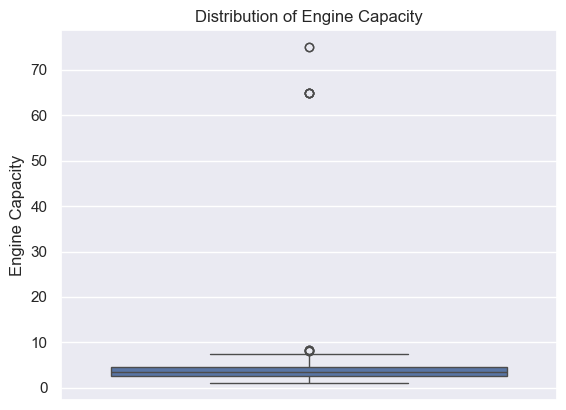

In [90]:
sns.boxplot(data=car_data, y='engine_capacity')
plt.title('Distribution of Engine Capacity')
plt.ylabel('Engine Capacity')
plt.show()

Looking at the distribution of the feature, second approach seems better option to deal with outliers as there are only 2 extreme values. Additionally, considering these vales as a inconsistent input makes sense as 6.5 and 7.5 liters are valid for engine capacity.

In [91]:
car_data.loc[car_data['engine_capacity'] > 10, 'engine_capacity'] = car_data.loc[car_data['engine_capacity'] > 10, 'engine_capacity'] / 10

In [92]:
car_data_copy=car_data.copy()           #For future use in Clustering

In [93]:
car_data

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horse_power,engine_capacity,cylinder_number,age
0,Ford,Utility Police Interceptor Base,51000,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,True,10300,300.0,3.7,6,12
1,Hyundai,Palisade SEL,34742,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,True,38005,NaN,3.8,0,4
2,Lexus,RX 350 RX 350,22372,Gasoline,Automatic,Blue,Black,None reported,False,54598,NaN,3.5,0,3
3,INFINITI,Q50 Hybrid Sport,88900,Hybrid,Automatic,Black,Black,None reported,True,15500,354.0,3.5,6,10
4,Audi,Q3 45 S line Premium Plus,9835,Gasoline,Automatic,Glacier White Metallic,Black,None reported,False,34999,NaN,2.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,Mercedes-Benz,E-Class E 300 4MATIC,53705,Gasoline,Automatic,Black,Black,At least 1 accident or damage reported,True,25900,241.0,2.0,4,7
3784,Audi,S4 3.0T Premium Plus,10900,Gasoline,Other,Black,Black,None reported,True,53900,349.0,3.0,6,3
3785,Porsche,Taycan,2116,Gasoline,Automatic,Black,Black,None reported,False,90998,NaN,NaN,0,3
3786,Ford,F-150 Raptor,33000,Gasoline,Automatic,Blue,Black,None reported,True,62999,450.0,3.5,6,5


### 5. Removing Unwanted Columns    
Before feature engineering, it is important to remove columns that do not provide meaningful information for modeling. Some columns may be redundant, highly unique, or irrelevant to predicting car prices. For example, identifiers or overly detailed fields such as `model`, `int_col`, and `ext_col` may introduce noise without improving model performance. By keeping only the relevant features, we simplify the dataset and make it easier to extract useful patterns.

In [94]:
#Dropping the unwanted columns
car_data= car_data.drop(columns=['model', 'ext_col', 'int_col', 'brand'])

In [95]:
car_data

,milage,fuel_type,transmission,accident,clean_title,price,horse_power,engine_capacity,cylinder_number,age
0,51000,E85 Flex Fuel,Automatic,At least 1 accident or damage reported,True,10300,300.0,3.7,6,12
1,34742,Gasoline,Automatic,At least 1 accident or damage reported,True,38005,NaN,3.8,0,4
2,22372,Gasoline,Automatic,None reported,False,54598,NaN,3.5,0,3
3,88900,Hybrid,Automatic,None reported,True,15500,354.0,3.5,6,10
4,9835,Gasoline,Automatic,None reported,False,34999,NaN,2.0,0,4
...,...,...,...,...,...,...,...,...,...,...
3783,53705,Gasoline,Automatic,At least 1 accident or damage reported,True,25900,241.0,2.0,4,7
3784,10900,Gasoline,Other,None reported,True,53900,349.0,3.0,6,3
3785,2116,Gasoline,Automatic,None reported,False,90998,NaN,NaN,0,3
3786,33000,Gasoline,Automatic,None reported,True,62999,450.0,3.5,6,5


### 6. Splitting features and Label

In [96]:
X= car_data.drop(columns='price')
y=car_data['price']

#Test Train split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

### 7. Pipelines

In [97]:
numeric_features= X.select_dtypes(include=[int, float]).columns.to_list()
num_pipeline= Pipeline([
    ('imputer', IterativeImputer()),
    ('scaler', StandardScaler())
])

catecategorical_features= X.select_dtypes(include=['object']).columns.to_list()
cat_pipeline= Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

### 8. Merging the pipelines

In [98]:
preprocessor= ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, catecategorical_features)
])

## Model Training (Supervised Learning)

### 1. Random Forest

In [99]:
rf_model= RandomForestRegressor(random_state=42, n_estimators=300, max_depth=7, min_samples_split=8, min_samples_leaf=4, max_features='sqrt')
rf_pipeline= Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [100]:
rf_y_pred= rf_pipeline.predict(X_test)

#Evaluating the model:

#For testing Dataset
mae= mean_absolute_error(y_test, rf_y_pred)
R2=r2_score(y_test, rf_y_pred)
rmse= root_mean_squared_error(y_test, rf_y_pred)
print("For Random Forest Algorithm (Test Data):")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {R2:.4f}")
print(f"MAE Score: {mae:.4f}")


#For training dataset
rf_y_pred1=rf_pipeline.predict(X_train)
mae= mean_absolute_error(y_train, rf_y_pred1)
R2=r2_score(y_train, rf_y_pred1)
rmse= root_mean_squared_error(y_train, rf_y_pred1)
print("\n\nFor Random Forest Algorithm: (Train Data)")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {R2:.4f}")
print(f"MAE Score: {mae:.4f}")

For Random Forest Algorithm (Test Data):
RMSE: 11099.8817
R2 Score: 0.7508
MAE Score: 7888.5532


For Random Forest Algorithm: (Train Data)
RMSE: 10660.9721
R2 Score: 0.7823
MAE Score: 7364.7161


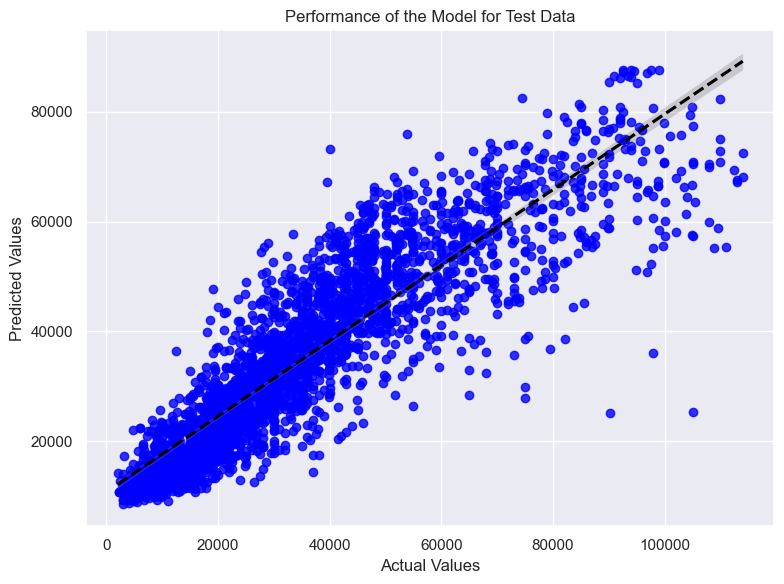

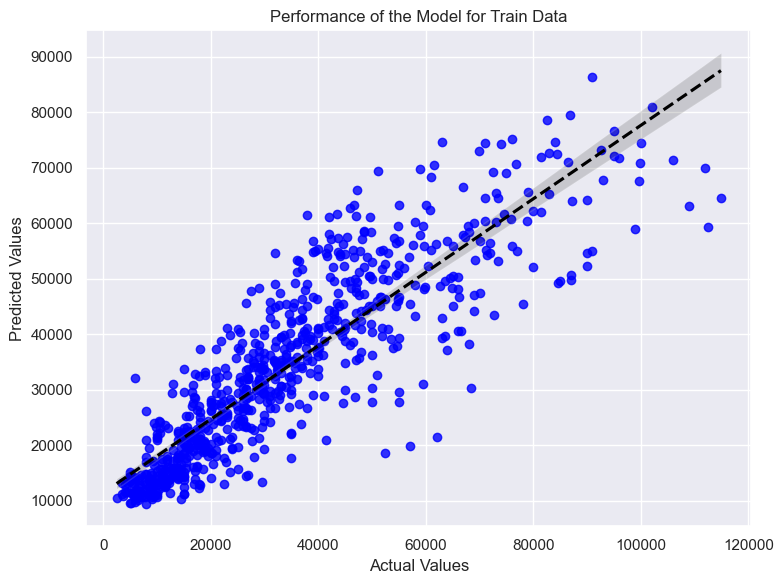

In [101]:

plt.figure(figsize=(8,6))
sns.regplot(x=y_train, y=rf_y_pred1, color='blue', line_kws={'color':'black', 'linestyle':'--'})
sns.set_style('whitegrid')
sns.set_theme('notebook')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Performance of the Model for Test Data')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=rf_y_pred, color='blue', line_kws={'color':'black', 'linestyle':'--'})
sns.set_style('whitegrid')
sns.set_theme('notebook')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Performance of the Model for Train Data')
plt.tight_layout()
plt.show()

The metrices for the training and testing dataset is almost same, meaning the model hasn't overfit. However, as the cars get expensive, the performance of the model decreases, suggesting that the model is not suitable for predicting the prices of fancier (or luxury) cars.

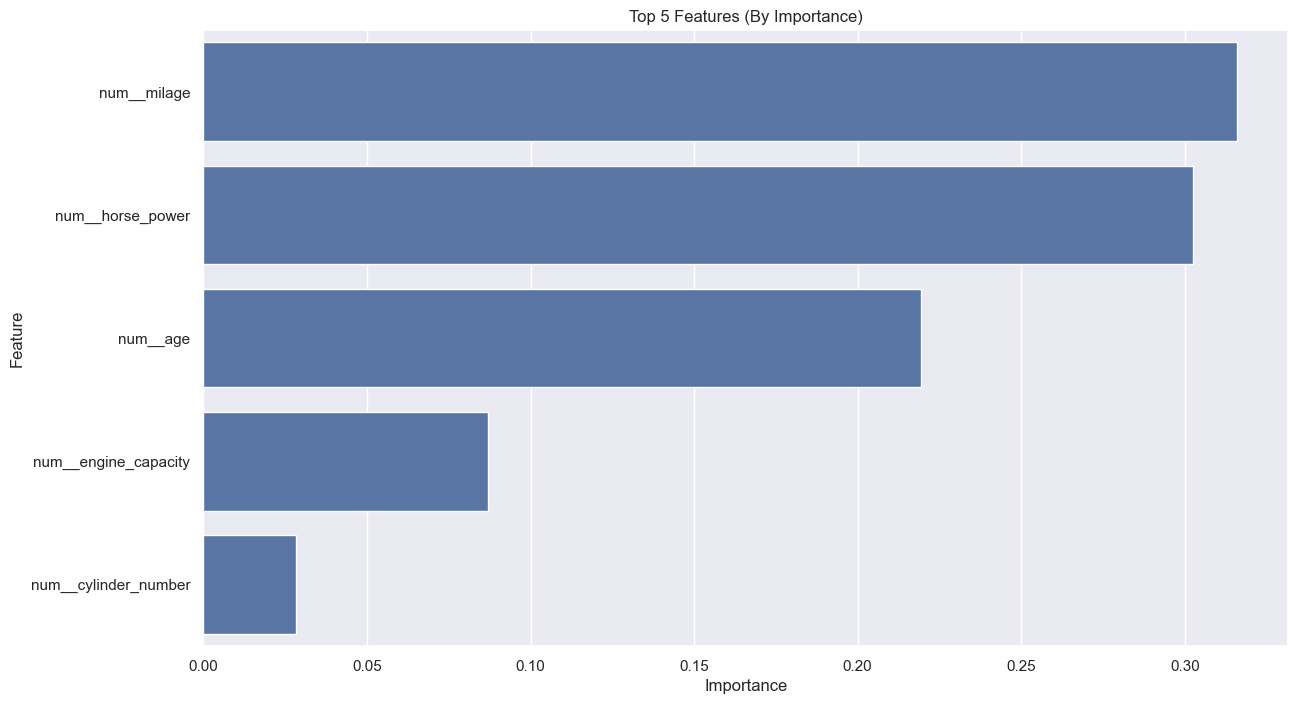

In [102]:
ct = rf_pipeline.named_steps['preprocessor']
feature_names = ct.get_feature_names_out()
importances = rf_pipeline.named_steps['model'].feature_importances_

important_features = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(data=important_features.head(5),
            x='Importance',
            y='Feature')
plt.title('Top 5 Features (By Importance)')
plt.show()

With this apporach, there is a drop in evaluation metrices, but the feature importance of the model seem to be balanced.

### 2. Linear Regression Model

In [103]:
lr_model= LinearRegression()

lr_pipeline= Pipeline([
    ('preprocessor', preprocessor),
    ('model', lr_model)
])

lr_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [104]:
lr_y_pred= lr_pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, lr_y_pred)
r2 = r2_score(y_test, lr_y_pred)
mae_final = mean_absolute_error(y_test, lr_y_pred)
print("For Liner Regression Model:")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"MAE Score: {mae_final:.4f}")

For Liner Regression Model:
RMSE: 12486.2445
R2 Score: 0.6847
MAE Score: 9293.9380


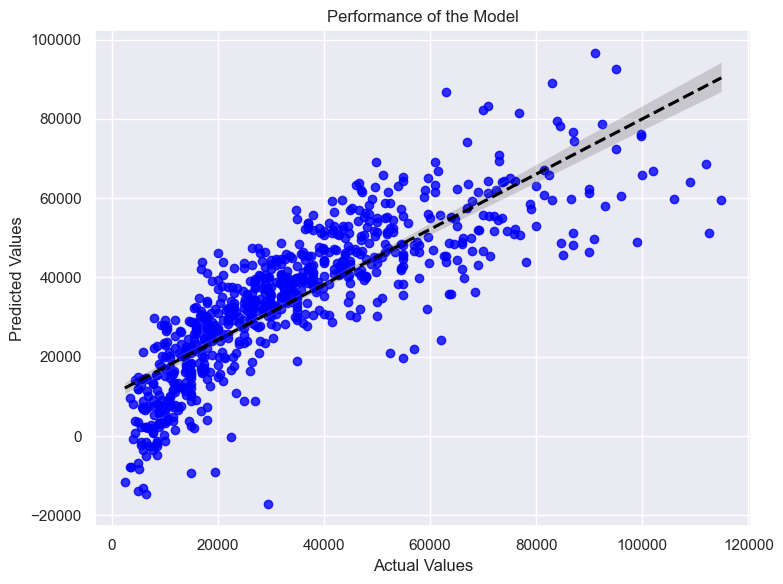

In [105]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=lr_y_pred, color='blue', line_kws={'color':'black', 'linestyle':'--'})
sns.set_style('whitegrid')
sns.set_theme('notebook')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Performance of the Model')
plt.tight_layout()
plt.show()

## Model Training (Unsupervised Learning)

In [106]:
#Imputing
numeric_features= car_data_copy.select_dtypes(include=[int, float]).columns.to_list()
imputer= IterativeImputer()
X_imputed= imputer.fit_transform(car_data_copy[numeric_features])
car_data_copy[numeric_features]= pd.DataFrame(X_imputed, columns=numeric_features, index=car_data_copy.index)

In [107]:
kmc= KMeans(n_clusters=4, random_state=0)
kmc.fit(car_data_copy[numeric_features])
labels= kmc.labels_
inertia= kmc.inertia_
sil_score= silhouette_score(car_data_copy[numeric_features], labels=labels)
sil_score
car_data_copy['clusters']= labels

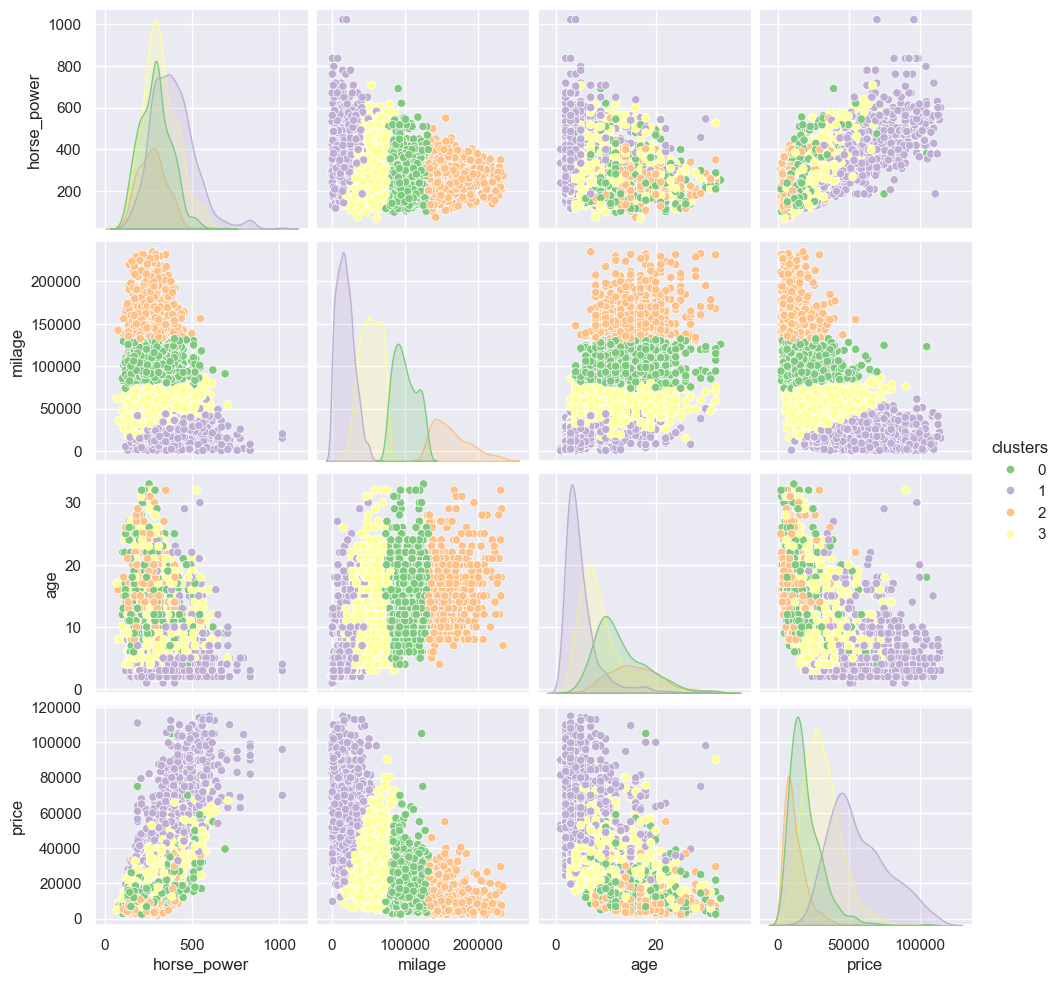

In [108]:
sns.pairplot(data=car_data_copy, hue='clusters', vars=['horse_power', 'milage', 'age', 'price'], palette='Accent')
plt.show()

Although the dataset has classical imbalance with most of the datapoints representing cars with `automatic` transmission type, it seem to be logically driven by `numeric features`

In [109]:
pd.crosstab(car_data_copy['clusters'], car_data_copy['transmission'])

transmission,Automatic,CVT,Manual,Other
clusters,,,,
0,697,19,105,87
1,999,12,86,124
2,363,5,43,29
3,921,26,119,153


In [110]:
car_data_copy.groupby('clusters')[['milage', 'age', 'horse_power', 'price']].mean()

,milage,age,horse_power,price
clusters,,,,
0,100400.046256,12.930617,290.040536,19464.498899
1,18177.388206,5.095004,389.869756,57356.331695
2,163631.095455,15.965909,272.199623,12358.847727
3,53119.674323,9.354389,318.121082,31129.124692


### Explanation:    
1. For cluster 0:
    * milage: High
    * age: Old cars
    * fanciness: Low
    * horse_power: Low
    * Price: Cheap

1. For cluster 1:
    * milage: Very Low
    * age: Youngest cars
    * fanciness: Highest
    * horse_power: Highest
    * Price: Most Expensive

1. For cluster 2:
    * milage: Highest
    * age: Oldest cars
    * fanciness: Least Fancy
    * horse_power: Lowest
    * Price: Cheapest

1. For cluster 3:
    * milage: Mid
    * age: Young cars
    * fanciness: High
    * horse_power: High
    * Price: Expensive

In [111]:
car_data_copy['clusters'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3788 entries, 0 to 3787
Series name: clusters
Non-Null Count  Dtype
--------------  -----
3788 non-null   int32
dtypes: int32(1)
memory usage: 14.9 KB


After clustering based on numeric features, the clusters seems to separate the dataset into meaningful groups of vehicles characterized by age, mileage, horsepower, and price. Transmission type did not align strongly with cluster assignments, indicating that it is not a primary driver of numeric similarity.

In [112]:
# Create mapping that supports int, float and str keys
mapping = {
    0: 'Budget',
    1: 'Luxury',
    2: 'Economy',
    3: 'Mid-Range'
}

car_data_copy['clusters']= car_data_copy['clusters'].replace(mapping)
car_data_copy.rename(columns={'clusters': 'price_range'}, inplace=True)
car_data_copy

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horse_power,engine_capacity,cylinder_number,age,price_range
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,True,10300.0,300.000000,3.700000,6.0,12.0,Mid-Range
1,Hyundai,Palisade SEL,34742.0,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,True,38005.0,354.368617,3.800000,0.0,4.0,Mid-Range
2,Lexus,RX 350 RX 350,22372.0,Gasoline,Automatic,Blue,Black,None reported,False,54598.0,383.603817,3.500000,0.0,3.0,Luxury
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,Automatic,Black,Black,None reported,True,15500.0,354.000000,3.500000,6.0,10.0,Budget
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,Automatic,Glacier White Metallic,Black,None reported,False,34999.0,267.894241,2.000000,0.0,4.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,Mercedes-Benz,E-Class E 300 4MATIC,53705.0,Gasoline,Automatic,Black,Black,At least 1 accident or damage reported,True,25900.0,241.000000,2.000000,4.0,7.0,Mid-Range
3784,Audi,S4 3.0T Premium Plus,10900.0,Gasoline,Other,Black,Black,None reported,True,53900.0,349.000000,3.000000,6.0,3.0,Luxury
3785,Porsche,Taycan,2116.0,Gasoline,Automatic,Black,Black,None reported,False,90998.0,486.137870,3.755869,0.0,3.0,Luxury
3786,Ford,F-150 Raptor,33000.0,Gasoline,Automatic,Blue,Black,None reported,True,62999.0,450.000000,3.500000,6.0,5.0,Luxury


## Saving the Model

Since, Random forest Regressor has the best metrices we will save this model and use it for predecting the price of used cars.

In [113]:
joblib.dump(rf_pipeline, 'Used_Car_Price_Pipeline.pkl')

['Used_Car_Price_Pipeline.pkl']

---

## Findings and Results   
This project used a dataset available on Kaggle to visualize the variation in used-car prices across different car features (including mileage, age, transmission type, and more) and to build a predictive model.    

The visualization consists of two major case studies. `Case Study I` focuses on the variation of car price with its age. This study concludes that car prices depreciate over time. However, there are certain luxury cars (like **Porsche 911 Carrera**) whose price seems to be really high despite being an old model. Similarly, `Case Study II` was focused on studying which transmission type is preferred mostly in the market and whether the transmission type of the car affects its price. The trend shows that the market prefers ***Automatic Transmission*** over other types, and the market preference seems to be heavily shifting towards Automatic vehicles over the past years. Initially, it was considered that the transmission type does affect the price, and the CVT transmission had the cheapest price. Further studies revealed that most of the CVTs are manufactured by mid-tier companies. This indicates that the lower price of CVT cars is likely due to the fact that CVTs are mostly manufactured by the mid-tier brands, rather than the transmission type itself influencing the price.   

The predictive modeling phase revealed that the Random Forest Algorithm was the most effective algorithm among the used algorithms. Milage, Horse Power, and Age were found to be the top 3 contributing features for this model. With the $R^2$ of 75-78%, the model explained most of the **car price** variation, but exposed its limitations as well. One major drawback of the model is the increasing loss function as car prices increase. The model performs descent for the low to mid-tier cars with the minimal loss function; however, for expensive and luxury brands, the loss function is quite high, and the predictions are off by thousands of dollars. Similarly, the unsupervised modeling (K Means CLustering) revealed that the numeric features of the dataset separated the dataset into meaningful groups based on their price range.

## Things Learned     
Through the project, I got an opportunity to learn different valuable skills like **storytelling**, which not only made the visualizations informative but also engaging. I gained a deeper understanding of **machine learning pipelines** with hands-on practice on their implementation. Additionally, I got an opportunity to explore **K Means Clustering**: how unsupervised models segment the whole dataset into meaningful clusters, and how these algorithms are implemented in Python. 